# Image Arithmetic OpenCV

### 연구 목표
- 이미지 픽셀배열의 더하기(Image Addition)
- 이미지 픽셀배열의 빼기(Image Subtraction)

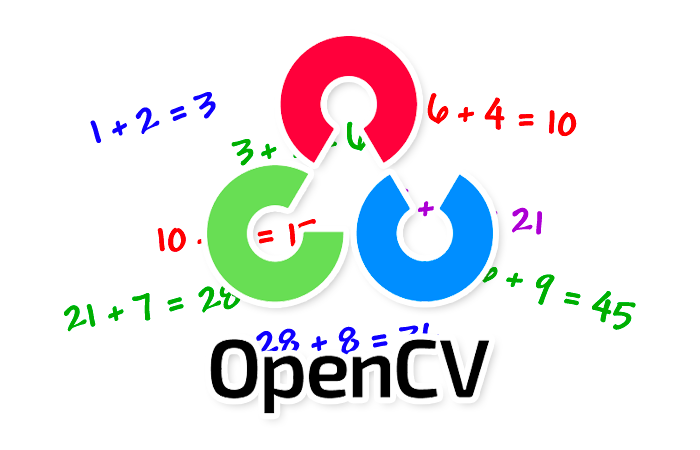

In [3]:
from IPython.display import Image
Image("https://www.pyimagesearch.com/wp-content/uploads/2021/01/opencv_image_arithmetic_header.png")

### 이미지 연산의 적용 가이드 
* `cv2.substract()`와 `cv2.add()` 함수
* 넘파이의 기본적인 `+`와 `-` 연산 방법 

### 이미지 다운로드 

In [4]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-image-arithmetic/opencv-image-arithmetic.zip
!unzip -qq opencv-image-arithmetic.zip
%cd opencv-image-arithmetic

--2021-04-19 22:19:28--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-image-arithmetic/opencv-image-arithmetic.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.212.89
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.212.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534763 (522K) [application/zip]
Saving to: ‘opencv-image-arithmetic.zip’

opencv-image-arithm 100%[===================>] 522.23K  1.18MB/s    in 0.4s    

2021-04-19 22:19:29 (1.18 MB/s) - ‘opencv-image-arithmetic.zip’ saved [534763/534763]

/content/opencv-image-arithmetic


## 코드 작성 및 수행

### 패키지 임포트

In [17]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

### 쥬피터와 코랩에서 이미지 표출 함수

In [26]:
def plt_imshow(title, image):
  """
  이미지 프레임을 BGR에서 RGB로 변환하고 해당 이미지를 표출
  """
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title(title)
  plt.imshow(image)
  plt.grid(True)
  plt.show()

### OpenCV를 이용한 이미지 연산

In [19]:
# 파이썬의 작성된 스크립트 터미널에서 수행(argument parsing)
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="grand_canyon.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# 쥬피터 혹은 코랩에서는 주석처리 후 아래로 사용
args = {
	"image": "grand_canyon.png"
}

In [20]:
# 넘파이에선 이미지를 부호없는 8비트 정수형(uint8)배열로 픽셀정보를 저장하며images are NumPy arrays stored as unsigned 8-bit integers (unit8)
# 값의 유효범위는 [0, 255]범위를 갖는다.
# OpenCV에서는 해당 범위를 벗어나게 되면 초과범위의 값이 클리핑된다.

# 리스트타입으로 값을 던져야 함.
added = cv2.add(np.uint8([200]), np.uint8([100]))  # 200과 100을 더했다. 범위를 넘는값이네.
substracted = cv2.subtract(np.uint8([50]), np.uint8([100]))

print("max of 255: {}".format(added)) # 결과는 넘는 범위는 잘라버린다.
print("min of 0: {}".format(substracted))  # -50이지만 범위이하이므로 0으로 클리핑핑

max of 255: [[255]]
min of 0: [[0]]


* [모듈러 연산에 대한 참조](https://en.wikipedia.org/wiki/Modular_arithmetic)

In [21]:
# 넘파이의 산술연산을 해보면..
# 클리핑 대신에 모듈러 연산("wrap around")을 진행 [0, 255]
added = np.uint8([200]) + np.uint8([100])
substracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [[0]]


* 모듈러 연산의 결과와 OpenCV연산의 결과를 선택하느냐는 이미지 연산에 어떤 결과물을 원하는지에 따라 선택지를 다를수있음을 유의.
* 웹상의 튜터리얼과 결과가 다른것에 대한 문의.

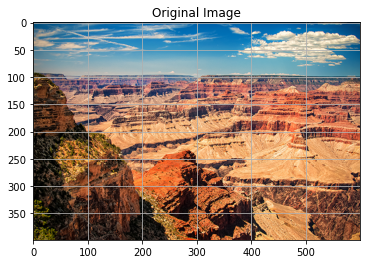

In [27]:
# load the original input image and display it to our screen
image = cv2.imread(args['image'])
plt_imshow("Original Image", image)

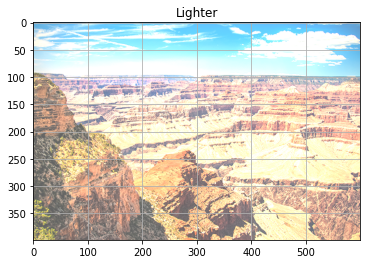

In [31]:
# 픽셀의 강도를 현재 이미지의 100배만큼 증가시킴increasing the pixel intensities in our input image by 100 is
# 넘파이 배열은 현행 이미지의 shape과 동일하게 유지.
# OpenCV의 add()

# 100을 더함으로써 픽셀이 더 밝은 색깔로 가도록 함.
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

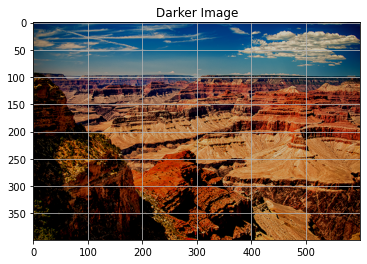

In [35]:
# 50픽셀을 이미지에서 빼면 아래와 같이 어두워진다.
M = np.ones(image.shape, dtype='uint8') * 50
substracted = cv2.subtract(image, M) 
plt_imshow("Darker Image", substracted)

### 정리
* 이미지가 상당한 정도로 원래 그랜드캐년의 이미지 색상보다 어두워진 느낌이다. 50픽셀정도를 RGB 색상에서 빼서 어두운쪽으로 반영된것.